<a href="https://colab.research.google.com/github/AbhishekP-Ai/Data-Structures-using-Python/blob/master/AutoEncoder_Unet_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
!ls "/content/gdrive/My Drive/Scripts/Datasets/images/train"

eosinophil  lymphocyte	monocyte  neutrophil


In [34]:
!ls "/content/gdrive/My Drive/Scripts/Datasets/images/test"

eosinophil  lymphocyte	monocyte  neutrophil


In [0]:
import os 
import cv2
import scipy 
from tqdm import tqdm 
from scipy.misc import imresize
import numpy as np 

In [94]:
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['neutrophil']:
                label = 1
            elif wbc_type in ['eosinophil']:
                label = 2
            elif wbc_type in ['monocyte']:
                label = 3  
            elif wbc_type in ['lymphocyte']:
                label = 4 
            else:
                label = 5
            for image_filename in tqdm(os.listdir(folder + wbc_type)):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                #img_file = cv2.cvtColor(img_file, cv2.COLOR_RGB2GRAY)
                if img_file is not None:
                    img_file = scipy.misc.imresize(arr=img_file, size=(224,224, 3))
                    #img_file = cv2.cvtColor(img_file, cv2.COLOR_RGB2GRAY)
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
     
    X = np.asarray(X)
    y = np.asarray(y)
  
    return X,y
X_train, y_train = get_data('/content/gdrive/My Drive/Scripts/Datasets/images/train/')
X_test, y_test = get_data('/content/gdrive/My Drive/Scripts/Datasets/images/test/')








  0%|          | 0/2499 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.






  1%|          | 16/2499 [00:00<00:15, 157.25it/s]





  1%|▏         | 33/2499 [00:00<00:15, 160.57it/s]





  2%|▏         | 50/2499 [00:00<00:15, 162.70it/s]





  3%|▎         | 66/2499 [00:00<00:15, 161.30it/s]





  3%|▎         | 81/2499 [00:00<00:15, 156.27it/s]





  4%|▍         | 98/2499 [00:00<00:15, 158.55it/s]





  5%|▍         | 114/2499 [00:00<00:15, 158.37it/s]





  5%|▌         | 131/2499 [00:00<00:14, 160.10it/s]





  6%|▌         | 148/2499 [00:00<00:14, 161.79it/s]





  7%|▋         | 164/2499 [00:01<00:14, 160.53it/s]





  7%|▋         | 181/2499 [00:01<00:14, 162.42it/s]





  8%|▊         | 198/2499 [00:01<00:14, 162.25it/s]





  9%|▊         | 215

In [99]:
input_img = Input(shape=(224,224,3))
print("input img shape -->",input_img.shape)
print("Train X Shape --> ",X_train.shape)
print("Train y Shape --> ",y_train.shape)

input img shape --> (?, 224, 224, 3)
Train X Shape -->  (9957, 224, 224, 3)
Train y Shape -->  (9957,)


In [100]:
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img) # 224,224,64
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)   # 112,112 128
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)   # 56,56,256 
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)  # 28,28,512
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)  # 14,14,512
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x) # 7,,7,512

x = Conv2D(512, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x) # 14,14,512
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x) # 28,28,
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x) # 56,56
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x) # 112,112
x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x) # 224,224
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

autoencoder.summary()

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 56, 56, 128)       0         
__________

In [101]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Use tf.cast instead.
Train on 9957 samples, validate on 2487 samples
Epoch 1/50


ResourceExhaustedError: ignored

In [80]:
#print("input img shape -->",input_img.shape)
print("Train X Shape --> ",X_train.shape)
print("Train y Shape --> ",y_train.shape)

Train X Shape -->  (9957, 32, 32, 3)
Train y Shape -->  (9957,)


In [0]:
batch_size = 50
num_classes = 10
epochs = 100

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [83]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (9957, 32, 32, 3)
9957 train samples
2487 test samples


In [0]:
# divide x_test into validation and test
X_val = X_test[:100]
X_test = X_test[100:]

In [85]:
print("validation data: {0} \ntest data: {1}".format(X_val.shape[0], X_test.shape[0]))

validation data: 100 
test data: 2387


In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [0]:
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras import backend as K

import os
import pickle
import numpy as np
import cv2







inputs = Input((32, 32, 3))
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

In [0]:
up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
conv10 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(conv9)

In [0]:
model = Model(inputs=[inputs], outputs=[conv10])
model.compile(optimizer='adam', loss=dice_coef_loss, metrics=[dice_coef])

In [62]:
model.load_weights("/content/gdrive/My Drive/Scripts/zf_unet_224.h5")

ValueError: ignored

In [63]:
history = model.fit(X_train, X_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, X_val),
                    shuffle=True)

Train on 9957 samples, validate on 2487 samples
Epoch 1/100
9957/9957 [==============================] - 13s 1ms/step - loss: -0.7921 - dice_coef: 0.7921 - val_loss: -0.7959 - val_dice_coef: 0.7959
Epoch 2/100
9957/9957 [==============================] - 6s 639us/step - loss: -0.7958 - dice_coef: 0.7958 - val_loss: -0.7959 - val_dice_coef: 0.7959
Epoch 3/100
9957/9957 [==============================] - 6s 647us/step - loss: -0.7958 - dice_coef: 0.7958 - val_loss: -0.7959 - val_dice_coef: 0.7959
Epoch 4/100
9957/9957 [==============================] - 7s 653us/step - loss: -0.7958 - dice_coef: 0.7958 - val_loss: -0.7959 - val_dice_coef: 0.7959
Epoch 5/100
9957/9957 [==============================] - 6s 648us/step - loss: -0.7958 - dice_coef: 0.7958 - val_loss: -0.7959 - val_dice_coef: 0.7959
Epoch 6/100
9957/9957 [==============================] - 6s 653us/step - loss: -0.7958 - dice_coef: 0.7958 - val_loss: -0.7959 - val_dice_coef: 0.7959
Epoch 7/100
9957/9957 [========================

In [86]:
score = model.evaluate(X_test, X_test, verbose=1)
print(score)

2387/2387 [==============================] - 1s 328us/step
[-0.7956961050511006, 0.7956961050511006]


In [0]:
btest = model.predict(X_test)
bval = model.predict(X_val)

In [88]:
print("b_test: {0}\nb_val: {1}".format(np.average(btest), np.average(bval)))

b_test: 0.9996744990348816
b_val: 0.9996744990348816


In [0]:
# definition to show original image and reconstructed image
def showOrigDec(orig, dec, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 8))

    for i in range(n):
        # display original
        ax = plt.subplot(4, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(4, n, i +1 + n)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display histogram
        ax = plt.subplot(4, n, i +1 + n + n)
        plt.hist((orig[i]*255).ravel(),256,[0,256])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)        
        
        ax = plt.subplot(4, n, i +1 + n + n + n)
        color = ('b','g','r')
        for j,col in enumerate(color):
            histr = cv2.calcHist([(orig[i]*255)],[j],None,[256],[0,256])
            plt.plot(histr,color = col)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)    
    plt.show()

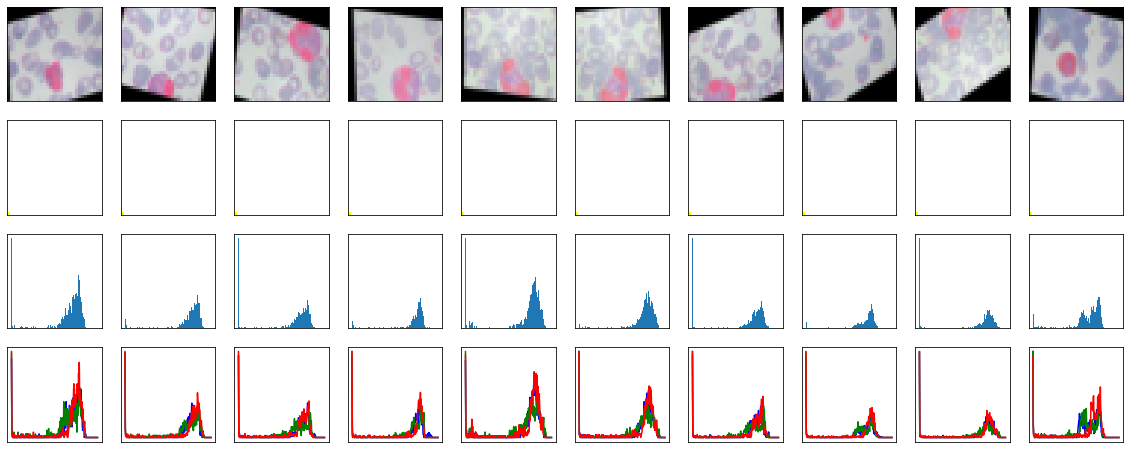

In [90]:
showOrigDec(X_test, btest)

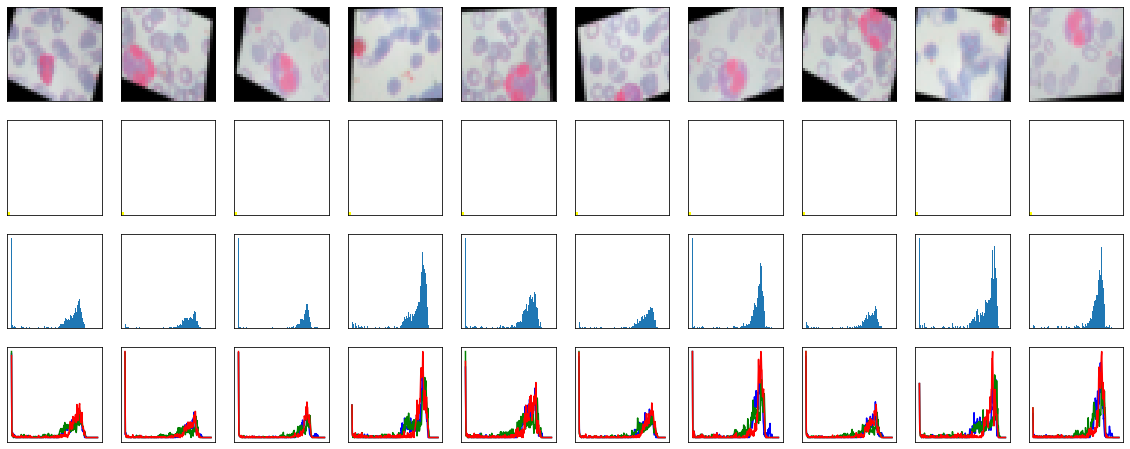

In [91]:
showOrigDec(X_test[100:], btest[100:])

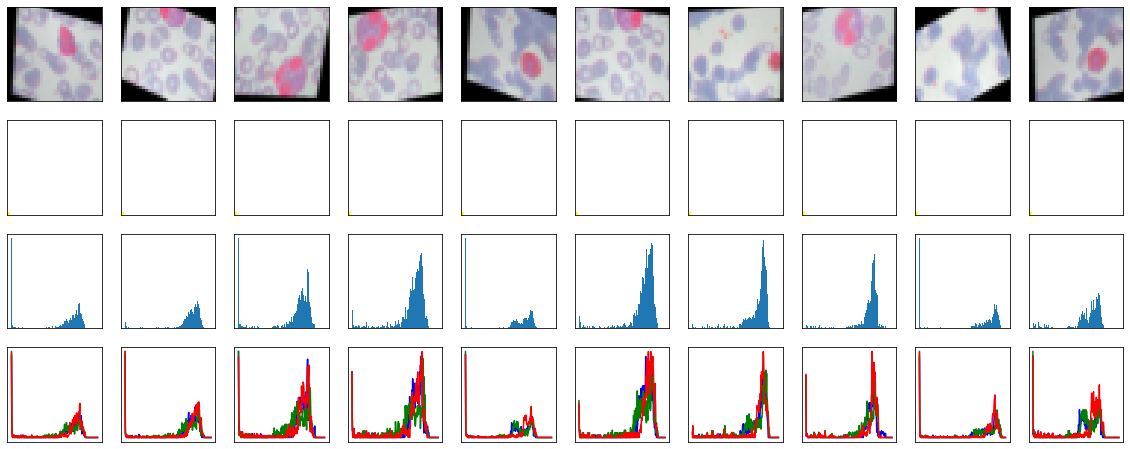

In [92]:
showOrigDec(X_test[200:], btest[200:])

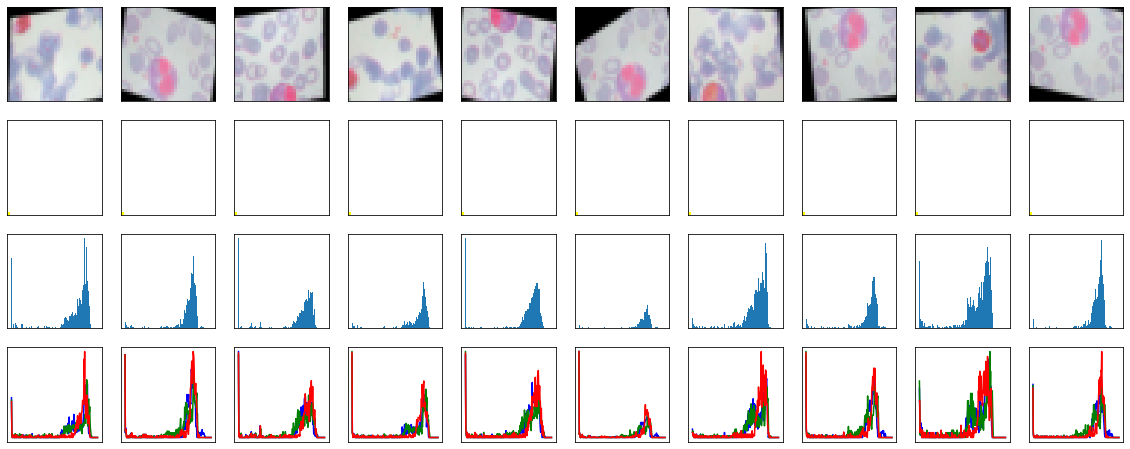

In [93]:
showOrigDec(X_val, bval)